C:\Users\michi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


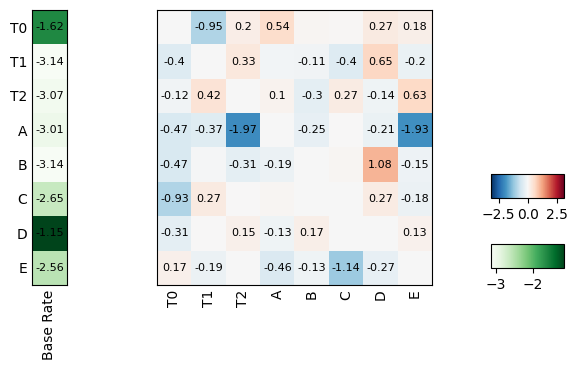

loading from mbonart_checkpoints/rmg1/mhn_SET
loading from mbonart_checkpoints/rmg1/mhn_TRAINED


(<matplotlib.image.AxesImage at 0x28584a15f90>,
 <matplotlib.colorbar.Colorbar at 0x28586ec6c10>)

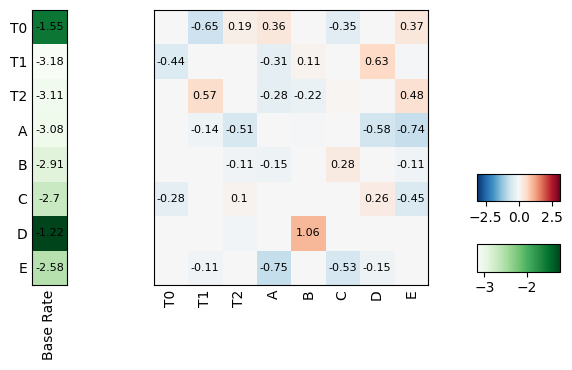

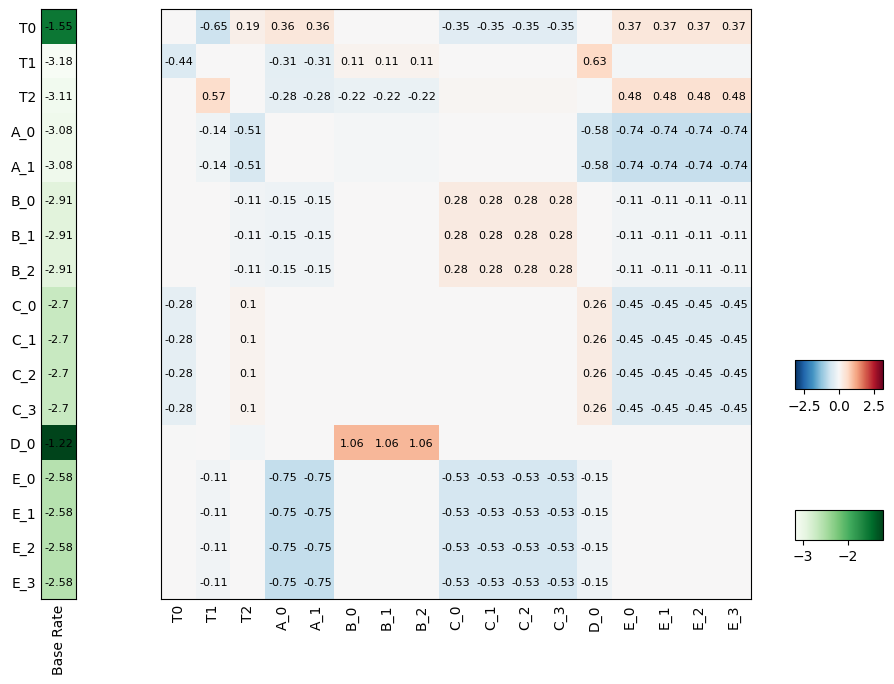

In [1]:
import sys

sys.path.append("..")


import mhn
import ClusterableMhnGenerator as cmg
import RandomMHNGenerator as rmg
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

np.random.seed(12345)

cl_generator = cmg.ClusterableMhnGenerator(3,5)
rand_generator = rmg.RandomMHNGenerator(cl_generator.getEvents())
rand_generator.randomizeBaseRates()
rand_generator.getMHN().log_theta[4,6]=1
rand_generator.getMHN().log_theta[3,7]=-2
rand_generator.getMHN().log_theta[2,4]=-0.3
rand_generator.getMHN().log_theta[7,5]=-0.9
rand_generator.getMHN().log_theta[0,1]=-1.2
rand_generator.getMHN().log_theta[2,1]=0.4
rand_generator.getMHN().log_theta[3,2]=-1.8
rand_generator.getMHN().log_theta[1,5]=-0.5
rand_generator.getMHN().log_theta[2,7]=0.8
rand_generator.getMHN().log_theta[0,3]=0.8
rand_generator.getMHN().log_theta[5,0]=-1.0

rand_generator.addNoise(0.2)

rand_generator.getMHN().plot()
plt.show()

#rand_generator.do_training_iteration(sample_num=100000,)
#rand_generator.saveto("mbonart_checkpoints/rmg1")
rand_generator.loadfrom("mbonart_checkpoints/rmg1")

cl_generator.setClusterMHN(rand_generator.getMHN())
#cl_generator.addNoiseOffDiags(0.1)

cl_generator.getMHN().plot()
#dont randomize baserates again?
cl_generator.splitClusters([2,3,4,1,4])#.randomizeBaseRates().addNoiseOffDiags(0.01,cl_generator.CMG_Domain.TOTAL)
#generator.addNoiseOffDiags(0.2, generator.CMG_Domain.CLUSTER, generator.CMG_Domain.TEST)

ground_truth_mhn = cl_generator.getMHN()
ground_truth_mhn.plot()

In [2]:
sampled_data=ground_truth_mhn.sample_artificial_data(100000, as_dataframe=True)

#compute distances based on the distances of redcued MHNs including the test events T1,..,TN
test_events= cl_generator.events[cl_generator.CMG_Step.SPLIT][cl_generator.CMG_Domain.TEST]
events= cl_generator.events[cl_generator.CMG_Step.SPLIT][cl_generator.CMG_Domain.CLUSTER]

print(sampled_data)


       T0  T1  T2  A_0  A_1  B_0  B_1  B_2  C_0  C_1  C_2  C_3  D_0  E_0  E_1  \
0       0   0   0    0    0    0    0    0    0    0    0    0    0    0    1   
1       0   0   0    0    0    0    0    0    0    0    0    0    0    0    0   
2       0   0   0    0    0    0    0    0    0    0    0    0    0    0    0   
3       1   0   1    0    0    0    0    0    0    0    0    0    1    1    0   
4       0   0   0    0    0    0    0    0    0    0    0    0    1    0    0   
...    ..  ..  ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
99995   0   0   0    1    0    0    0    0    0    0    0    0    0    0    0   
99996   0   0   0    0    0    0    0    1    0    0    1    0    0    0    0   
99997   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0   
99998   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0   
99999   0   0   0    0    0    1    0    0    0    0    0    0    0    0    0   

       E_2  E_3  
0        

In [ ]:
import EventDistanceMeasurer as edm

dist_measurer=edm.EventDistanceMeasurer(test_events, events)
dist_measurer.load_data(sampled_data)
#dist_measurer.train_All_MHNs()
#dist_measurer.saveto("mbonart_checkpoints/edm3-1")
dist_measurer.loadfrom("mbonart_checkpoints/edm3-1")


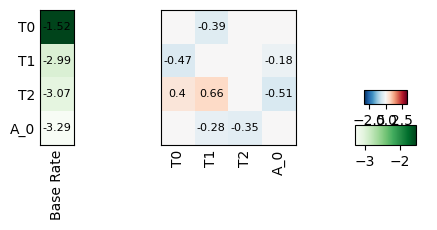

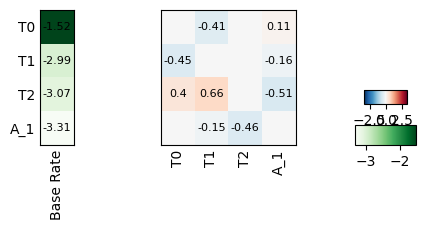

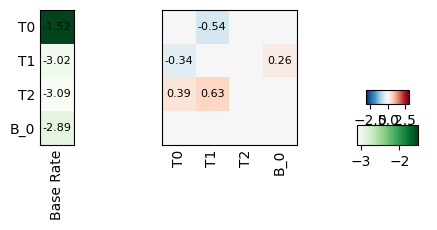

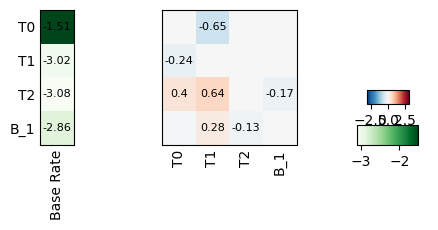

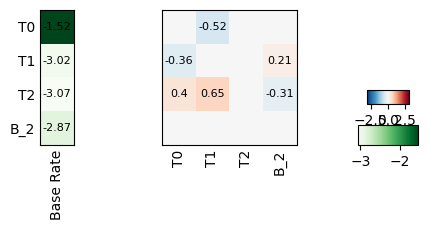

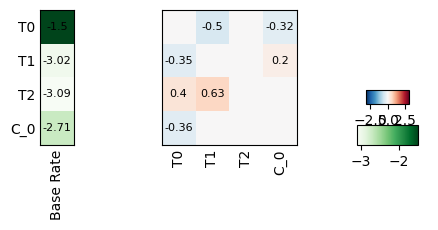

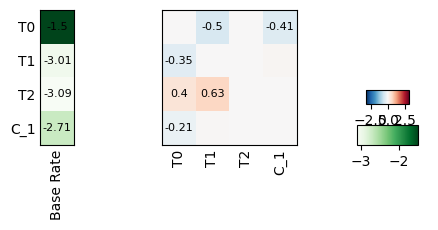

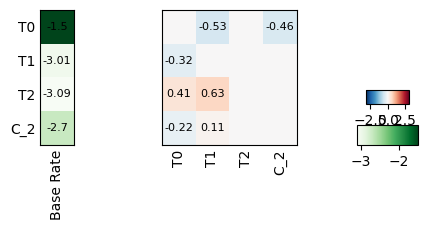

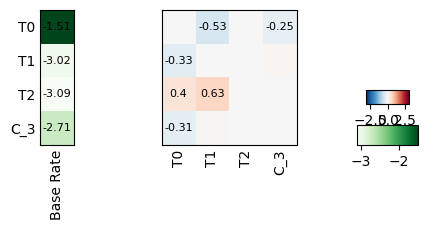

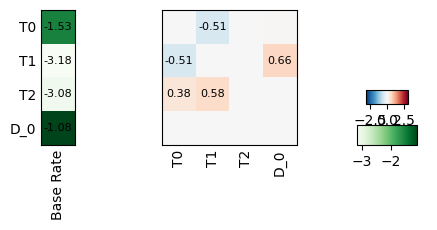

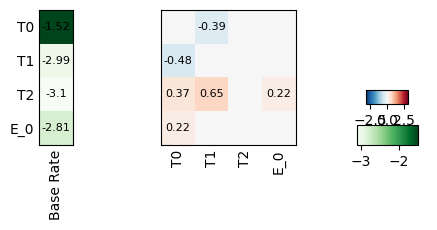

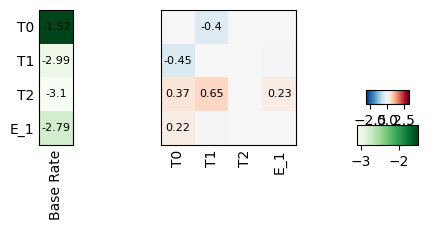

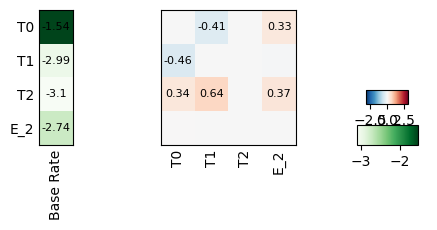

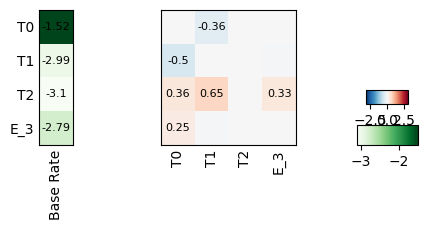

In [12]:
for ev in events:
    dist_measurer._mhns[ev].plot()

get func for DistMeasure.OFFDIAG_EUCLID
Distance function: <function euclid_dist_offdiag at 0x0000028586F7D6C0>


<Axes: >

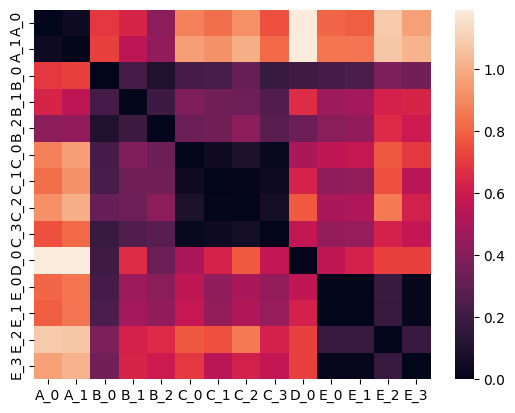

In [13]:
dist_measurer.compute_distance_matrix(dist_measurer.DistMeasure.OFFDIAG_EUCLID)
sns.heatmap(dist_measurer._dist_mat)

C:\Users\michi\AppData\Local\Temp\ipykernel_6196\3186003459.py:6: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat)


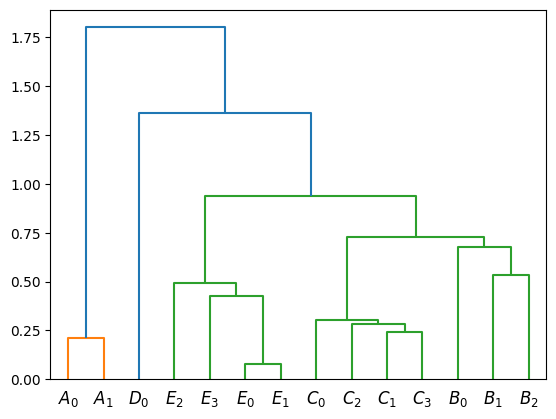

In [15]:
import scipy.spatial
import scipy.cluster

#condensed_dist_mat=scipy.spatial.distance.squareform(dist_measurer._dist_mat)

linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat)
scipy.cluster.hierarchy.dendrogram(linkage, labels= [f"${ev}$" for ev in dist_measurer._events])
plt.show()